# This is a heart disease prediction model. This Machine learning model gives the comparision between many models used for classification , and then concludes with the best model for prediction and gves the feature importance of all the various attributes of the dataset.
#Along with all this , we have performed data cleaning , data pre-processing as and when required , and the given visual represntation of all the findings and results.
#Given the nature of this model that is classiifcation , There are many different models used , and there is a comparision among all the model , along with the heatmaps, and appropriate graphs for all of them.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,roc_auc_score,plot_roc_curve
import tensorflow as tf
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# Dataset : Kaggle Heart Failure Prediction Dataset :
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## The various attributes are : 
1. Age
2. Sex
3. CP
4. TrestBP
5. Cholestrol
6. FBS
7. RestECG
8. Thalach
9. Exang

In [ ]:
## Total number of entries:
len(data)

918

In [ ]:
data_df = pd.DataFrame(data)
data_df.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


In [ ]:
data_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
## Data Pre-processing: 
len(data_df)
# Since there are categorical values in the dataset like M for Male and F for Female, we will convert them into numbers for better processing
data_df.loc[data_df['Sex'] == 'M' , 'Sex'] = 1
data_df.loc[data_df['Sex'] == 'F' , 'Sex'] = 0
data_df
## 1 is for male , 0 is for Female
## Likewise , we'll change all the cateogorical data to int64 datatype

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data_df['RestingECG'].unique()
# Changing RestingEcg from categorical to Numerical and appending to dataFrame
new_data = pd.get_dummies(data_df['RestingECG'])
new_cols = pd.concat([data_df , new_data] , axis=1)
new_cols.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'LVH', 'Normal', 'ST'],
      dtype='object')

In [ ]:
new_cols

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,LVH,Normal,ST
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,0
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,0
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0


In [ ]:
new_cols['ChestPainType'].unique()
new_data1 = pd.get_dummies(new_cols['ChestPainType'])
new_new_cols = pd.concat([new_cols , new_data1] , axis =1)

In [ ]:
new_new_cols = new_new_cols.drop(['ChestPainType'],axis=1)
new_new_cols

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,LVH,Normal,ST,ASY,ATA,NAP,TA
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0,1,0,0
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,0,1,0,1,0,0
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,1,0,0,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0,0,0,0,1
914,68,1,144,193,1,Normal,141,N,3.4,Flat,1,0,1,0,1,0,0,0
915,57,1,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,0,1,0,0,0
916,57,0,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,0,1,0,0


In [ ]:
new_new_cols['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
new_data2 = pd.get_dummies(new_new_cols['ST_Slope'])
new_new_new_cols = pd.concat([new_new_cols , new_data2] , axis =1)

In [ ]:
new_new_new_cols

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,...,LVH,Normal,ST,ASY,ATA,NAP,TA,Down,Flat,Up
0,40,1,140,289,0,Normal,172,N,0.0,Up,...,0,1,0,0,1,0,0,0,0,1
1,49,0,160,180,0,Normal,156,N,1.0,Flat,...,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,...,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,...,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,N,1.2,Flat,...,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,Normal,141,N,3.4,Flat,...,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,Normal,115,Y,1.2,Flat,...,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,LVH,174,N,0.0,Flat,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
latest_cols = new_new_new_cols.drop(['ST_Slope'] , axis =1)
latest_cols

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,LVH,Normal,ST,ASY,ATA,NAP,TA,Down,Flat,Up
0,40,1,140,289,0,Normal,172,N,0.0,0,0,1,0,0,1,0,0,0,0,1
1,49,0,160,180,0,Normal,156,N,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,Normal,122,N,0.0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,N,1.2,1,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,Normal,141,N,3.4,1,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,Normal,115,Y,1.2,1,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,LVH,174,N,0.0,1,1,0,0,0,1,0,0,0,1,0


In [ ]:
latest_cols = latest_cols.drop(['RestingECG'],axis=1)

In [ ]:
latest_cols

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,LVH,Normal,ST,ASY,ATA,NAP,TA,Down,Flat,Up
0,40,1,140,289,0,172,N,0.0,0,0,1,0,0,1,0,0,0,0,1
1,49,0,160,180,0,156,N,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,N,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,108,Y,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,122,N,0.0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,N,1.2,1,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,141,N,3.4,1,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,115,Y,1.2,1,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,174,N,0.0,1,1,0,0,0,1,0,0,0,1,0


In [ ]:
latest_cols.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'LVH', 'Normal', 'ST',
       'ASY', 'ATA', 'NAP', 'TA', 'Down', 'Flat', 'Up'],
      dtype='object')

In [ ]:
latest_cols['ExerciseAngina']

0      N
1      N
2      N
3      Y
4      N
      ..
913    N
914    N
915    Y
916    N
917    N
Name: ExerciseAngina, Length: 918, dtype: object

In [ ]:
## ExcerciseAngina is categorical , changing it to int64 for better processing
latest_cols.loc[latest_cols['ExerciseAngina'] == 'N' , 'ExerciseAngina'] = 0
latest_cols.loc[latest_cols['ExerciseAngina'] == 'Y' , 'ExerciseAngina'] = 1
latest_cols

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,LVH,Normal,ST,ASY,ATA,NAP,TA,Down,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,1,0,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,1,0,0,0,1,0,0,0,1,0


# Now All the data is Numeric , we can continue with Visualization

In [ ]:
latest_cols

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffac7a729a0>,
      dtype=object)

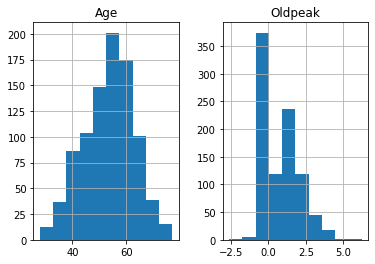

In [ ]:
## Data Visualization : 

latest_cols[["Age","Sex","Oldpeak"]].hist()

In [ ]:
#3 Do more data visualization

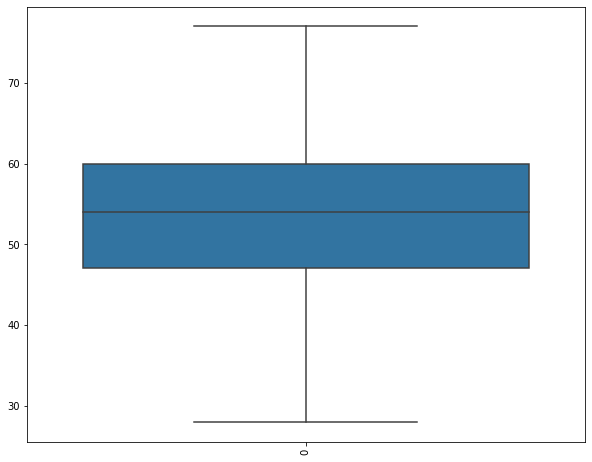

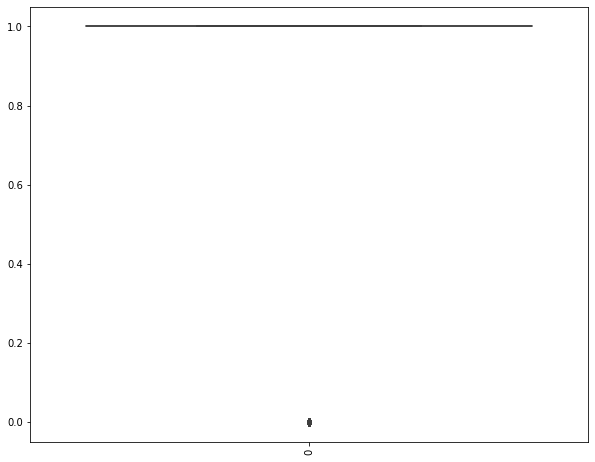

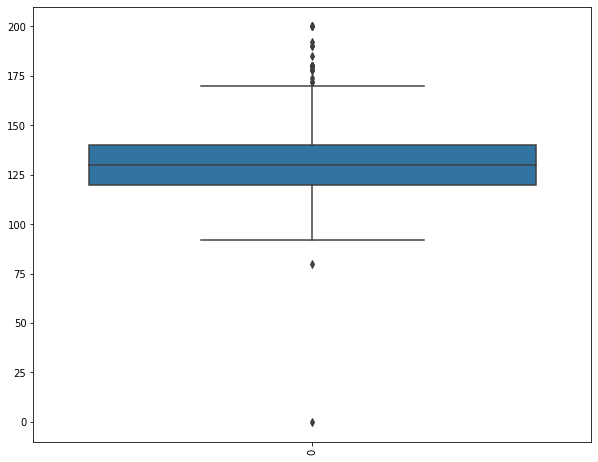

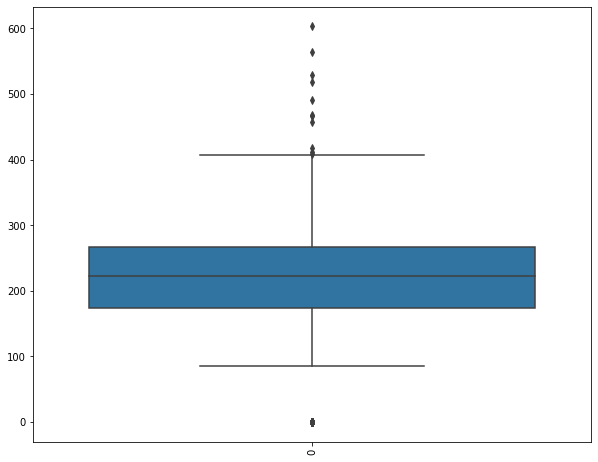

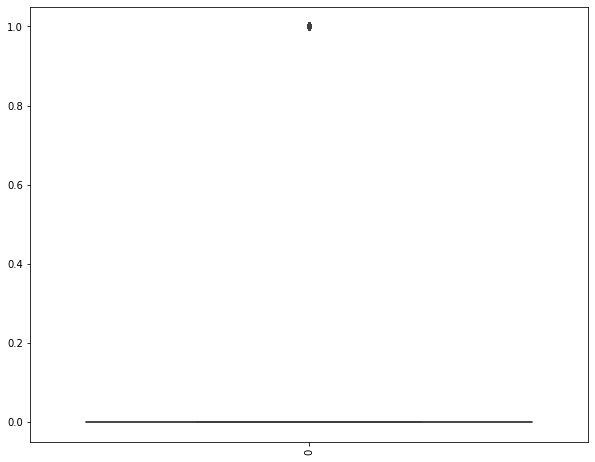

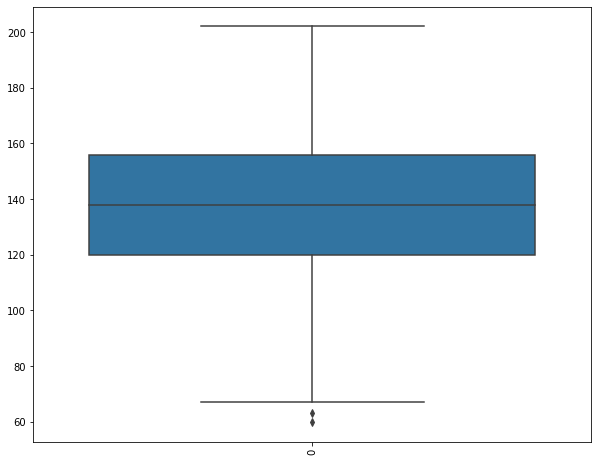

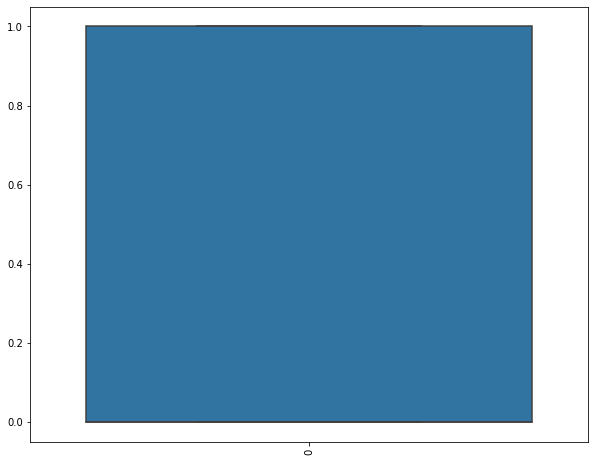

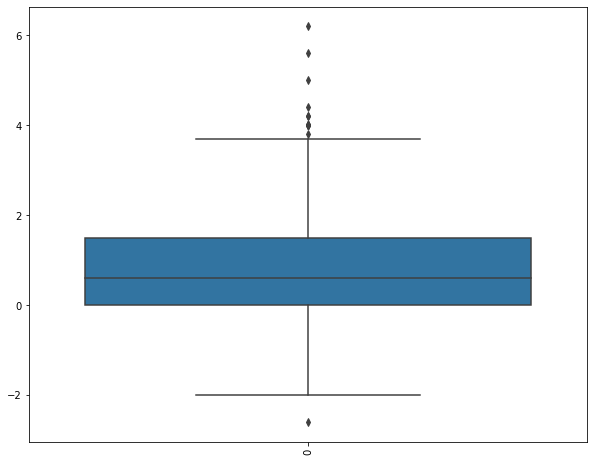

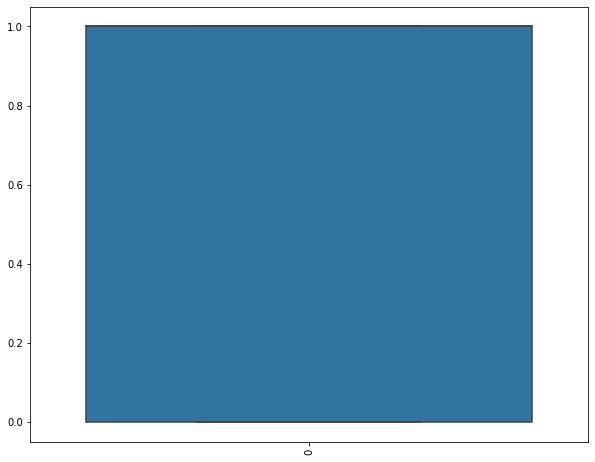

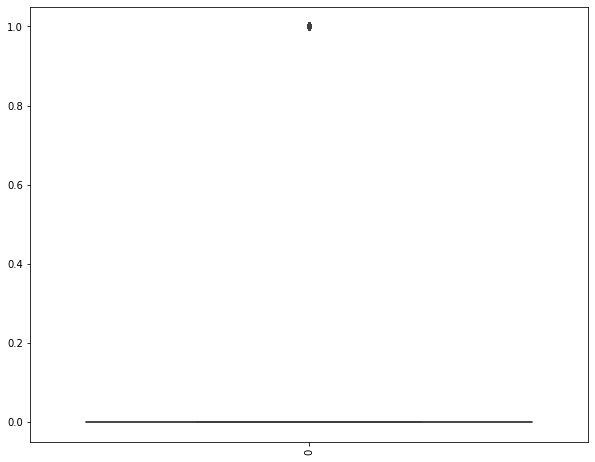

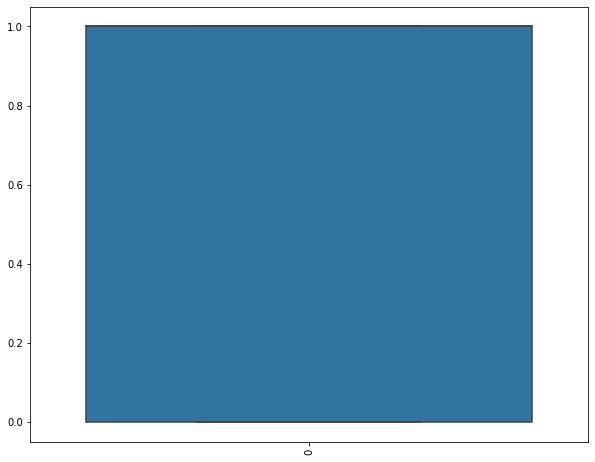

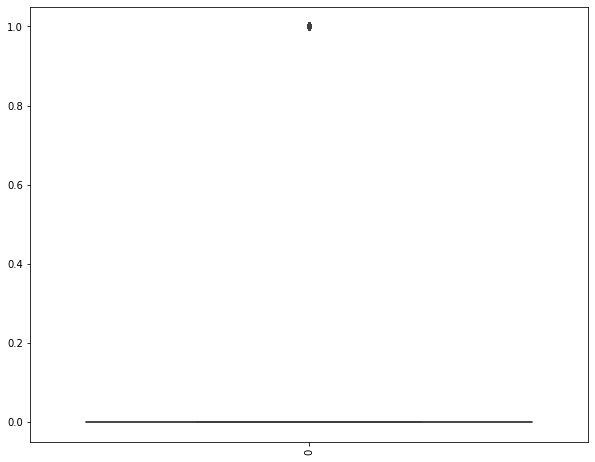

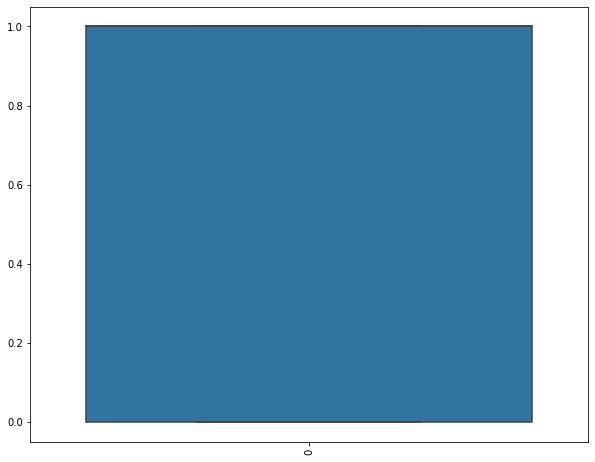

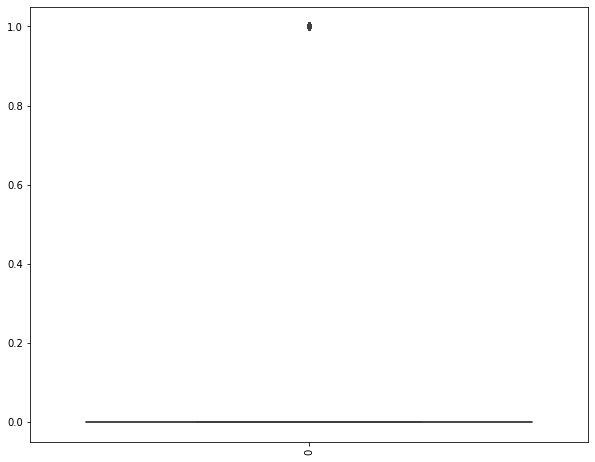

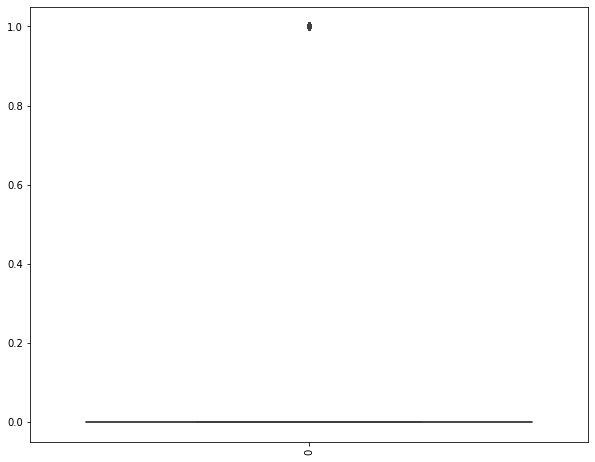

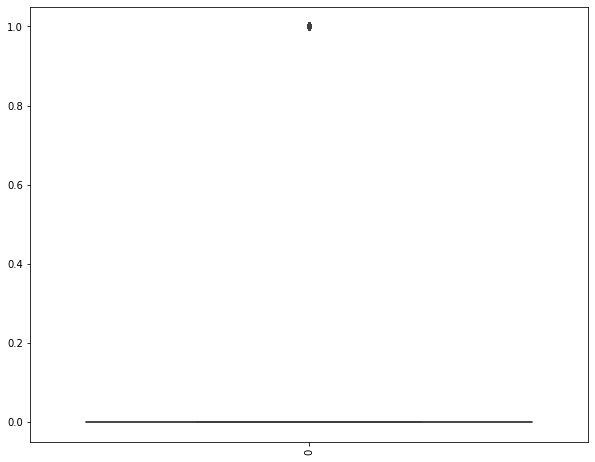

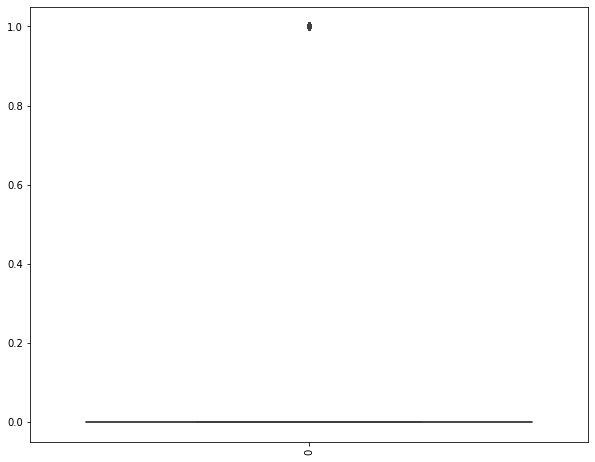

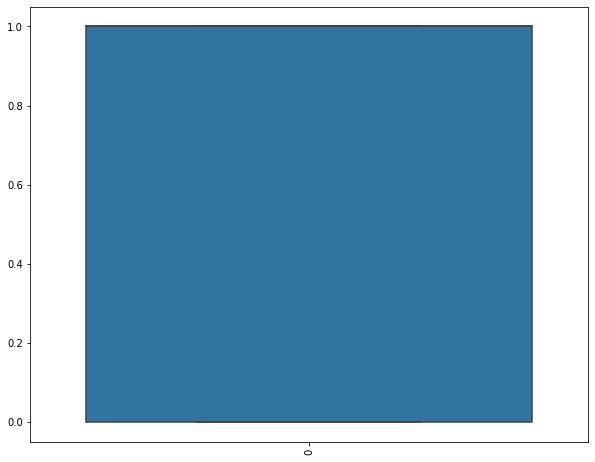

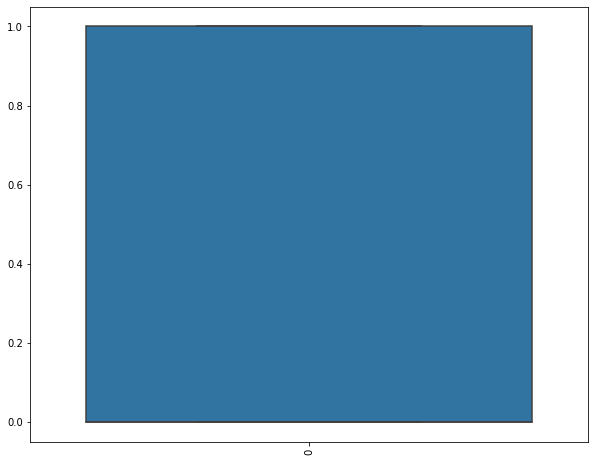

In [ ]:
# Boxplots of all attributes

for cat in latest_cols.columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(data=latest_cols[cat])
  plt.xticks(rotation=90)
  plt.show()

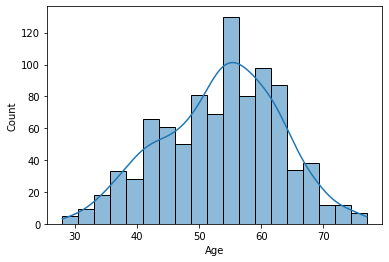

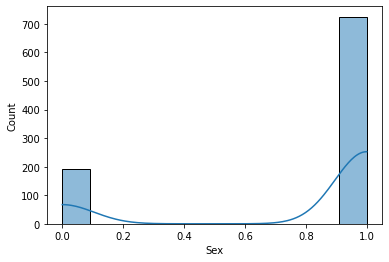

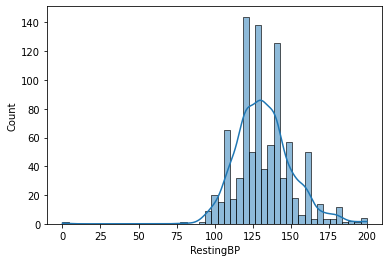

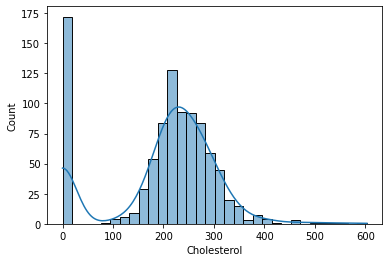

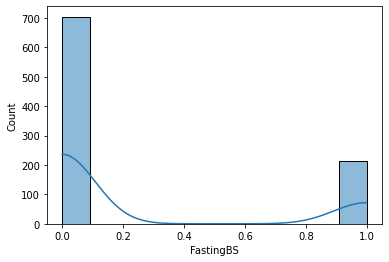

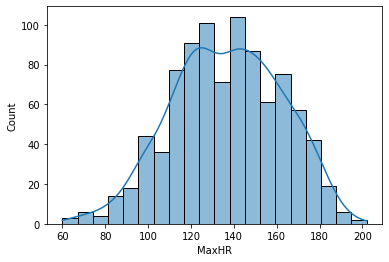

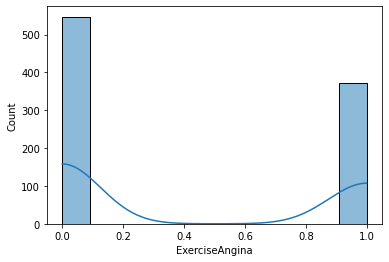

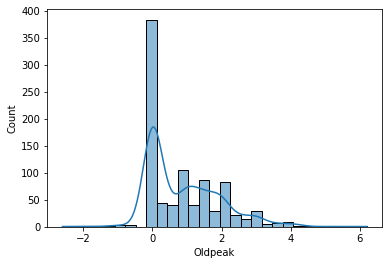

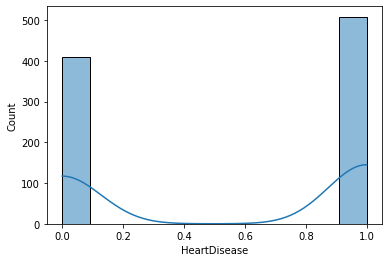

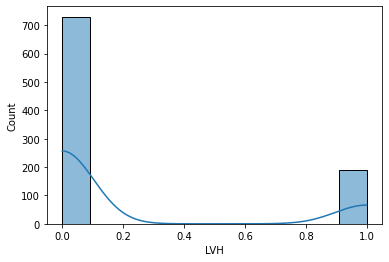

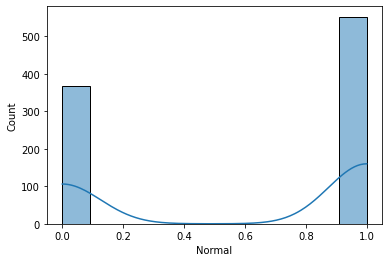

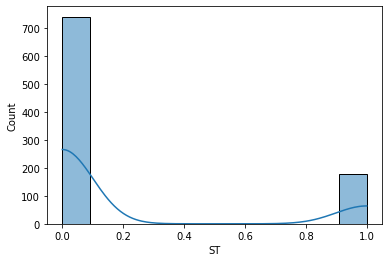

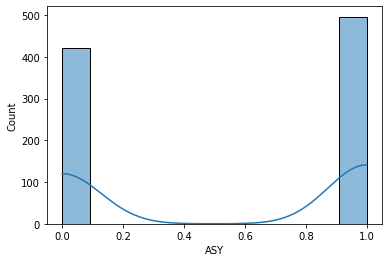

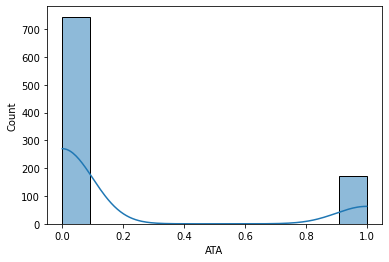

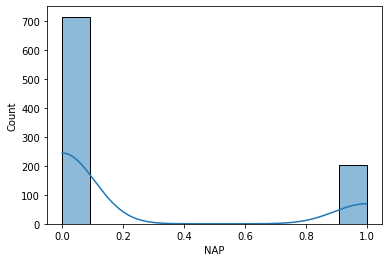

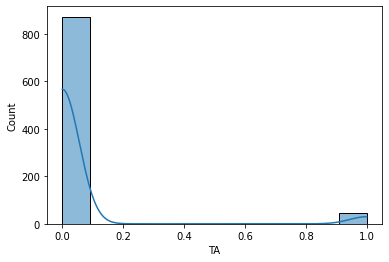

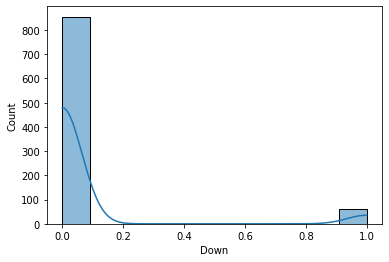

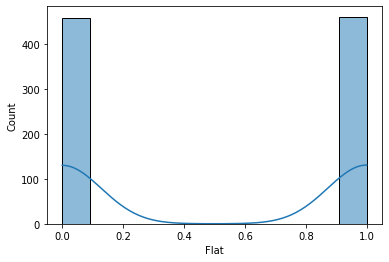

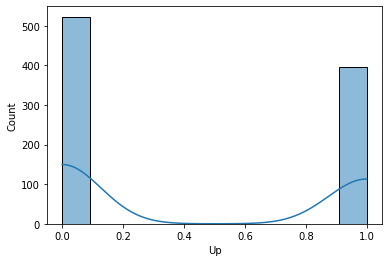

In [ ]:
for cat in latest_cols.columns:
  sns.histplot(data=latest_cols[cat] , kde=True)
  plt.show()

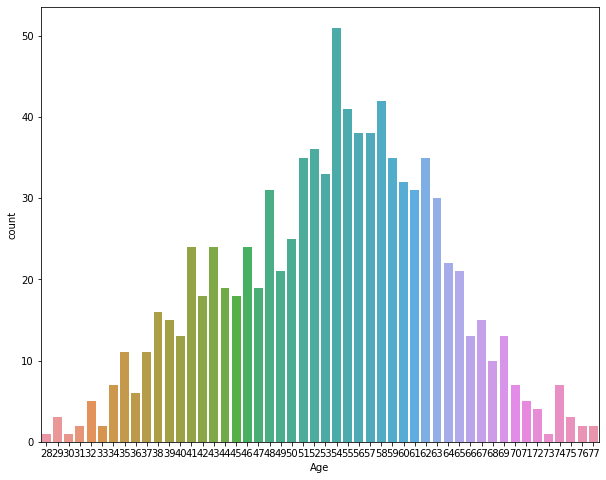

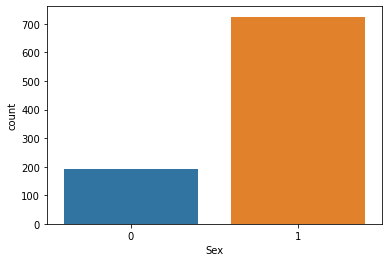

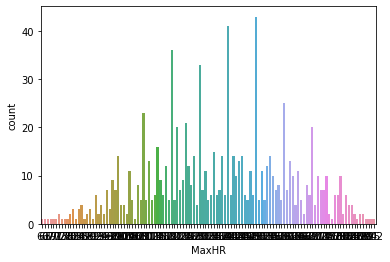

In [ ]:
## Frequency distributions for Various Attributes:
plt.figure(figsize=(10,8))
sns.countplot(x=latest_cols['Age'])
plt.show()
sns.countplot(x=latest_cols['Sex'])
plt.show()
sns.countplot(x=latest_cols['MaxHR'])
plt.show()

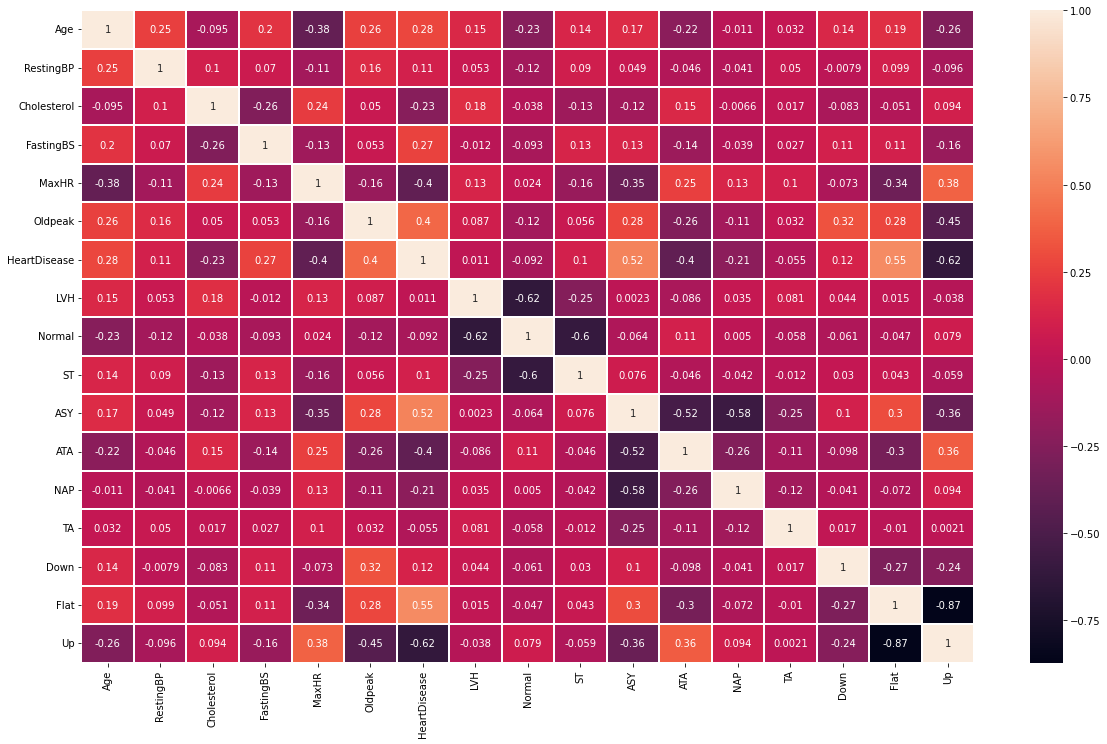

In [ ]:
## HeatMap for correlation
plt.figure(figsize=(20,12))
corr = latest_cols.corr()
sns.heatmap(corr,annot=True , linewidth=1)
plt.show()

In [ ]:
latest_cols

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,LVH,Normal,ST,ASY,ATA,NAP,TA,Down,Flat,Up
21,44,1,120,184,0,142,0,1.0,0,0,1,0,0,1,0,0,0,1,0
767,54,0,108,267,0,167,0,0.0,0,1,0,0,0,0,1,0,0,0,1
464,59,1,131,0,0,128,1,2.0,1,0,1,0,0,0,1,0,1,0,0
472,53,1,154,0,1,140,1,1.5,1,0,0,1,1,0,0,0,0,1,0
167,48,1,140,238,0,118,0,0.0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,59,1,122,233,0,117,1,1.3,1,0,1,0,1,0,0,0,1,0,0
521,61,1,120,282,0,135,1,4.0,1,0,0,1,1,0,0,0,1,0,0
333,40,1,95,0,1,144,0,0.0,1,0,0,1,1,0,0,0,0,0,1
888,52,1,128,204,1,156,1,1.0,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
## Divind into training , validation , and testing dataset
latest_cols = latest_cols.sample(frac=1)
X = latest_cols.drop('HeartDisease',axis=1)
Y = latest_cols['HeartDisease']
X_train , X_test = X[:818] , X[818:]
Y_train , Y_test = Y[:818] , Y[818:]

len(X_train), len(Y_train) , len(X_test) , len(Y_test)

(818, 818, 100, 100)

In [ ]:
X_train , len(X_train)

(     Age Sex  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  \
 807   54   1        108          309          0    156              0   
 309   57   1         95            0          1    182              0   
 355   67   1        145            0          0    125              0   
 108   50   1        140          129          0    135              0   
 24    40   1        130          215          0    138              0   
 ..   ...  ..        ...          ...        ...    ...            ...   
 785   69   1        160          234          1    131              0   
 589   74   1        140          237          1     94              0   
 463   51   1        128            0          0    107              0   
 28    53   0        113          468          0    127              0   
 289   36   1        120          166          0    180              0   
 
      Oldpeak  LVH  Normal  ST  ASY  ATA  NAP  TA  Down  Flat  Up  
 807      0.0    0       1   0    0    1  

In [ ]:
len(Y_train) , len(Y_train)

(818, 818)

In [ ]:
## Creatin a fucntion for evaluating the model
def eve(y_true,y_pred , model):
    plt.figure(figsize=(10,8))
    conf_mat = confusion_matrix(y_true,y_pred)
    sns.heatmap(conf_mat , annot=True , linewidth=1)
    print("Accuracy  : ",accuracy_score(y_true,y_pred),"%")
    print("Precision : ",precision_score(y_true,y_pred),"%")
    print("Recall    : ",recall_score(y_true,y_pred),"%")
    print("F1 Score  : ",f1_score(y_true,y_pred),"%")
    print("ROC_AUC_Score : ",roc_auc_score(y_true,y_pred))
    print()
    print("******************Classification Report*****************")
    print(classification_report(y_true,y_pred))
    plt.figure(figsize=(15,8))
    plot_roc_curve(model,X_test,y_true)

# First trying Logistic Regression:

In [ ]:
np.random.seed(42)
model1 = LogisticRegression(max_iter=1000000)
model1.fit(X_train , Y_train)

LogisticRegression(max_iter=1000000)

Accuracy  :  0.88 %
Precision :  0.8793103448275862 %
Recall    :  0.9107142857142857 %
F1 Score  :  0.8947368421052632 %
ROC_AUC_Score :  0.8758116883116882

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.88      0.91      0.89        56

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


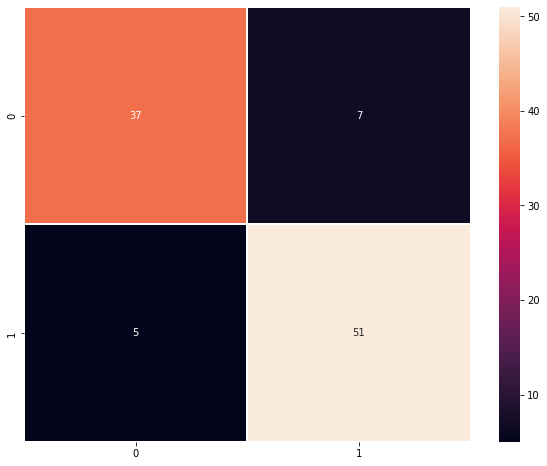

<Figure size 1080x576 with 0 Axes>

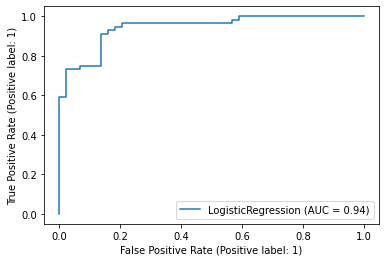

In [ ]:
Y_logistic_pred = model1.predict(X_test)
eve(Y_test ,Y_logistic_pred , model1)

# Tring K-Nearest Neighbors

In [ ]:
np.random.seed(42)
model2 = KNeighborsClassifier(n_jobs=-1)
model2.fit(X_train , Y_train)

KNeighborsClassifier(n_jobs=-1)

Accuracy  :  0.62 %
Precision :  0.6551724137931034 %
Recall    :  0.6785714285714286 %
F1 Score  :  0.6666666666666666 %
ROC_AUC_Score :  0.612012987012987

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        44
           1       0.66      0.68      0.67        56

    accuracy                           0.62       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.62      0.62      0.62       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


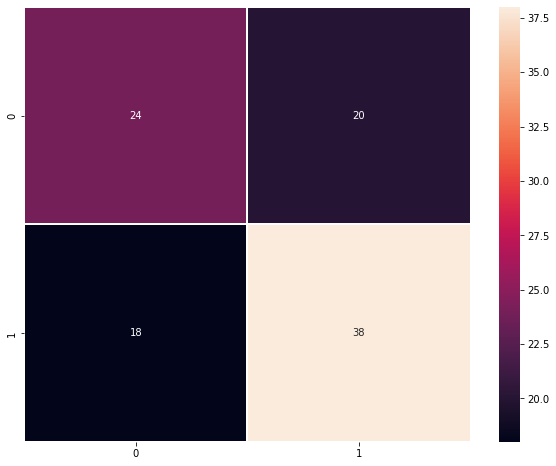

<Figure size 1080x576 with 0 Axes>

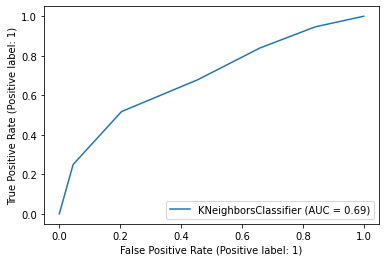

In [ ]:
Y_knn_pred = model2.predict(X_test)
eve(Y_test , Y_knn_pred , model2)

# Trying RandomForestClassifier

In [ ]:
np.random.seed(42)
model3 = RandomForestClassifier(n_estimators=250)
model3.fit(X_train , Y_train)

RandomForestClassifier(n_estimators=250)

Accuracy  :  0.88 %
Precision :  0.8793103448275862 %
Recall    :  0.9107142857142857 %
F1 Score  :  0.8947368421052632 %
ROC_AUC_Score :  0.8758116883116882

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.88      0.91      0.89        56

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


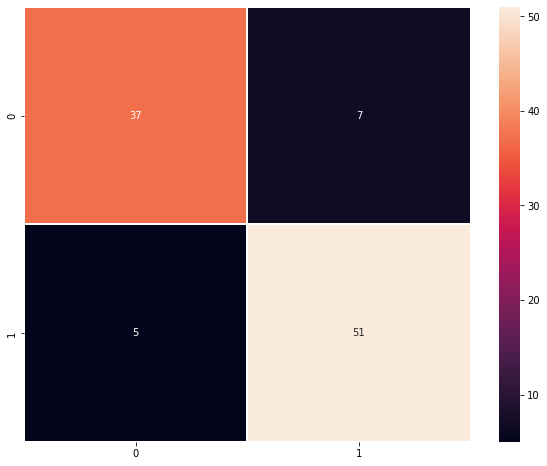

<Figure size 1080x576 with 0 Axes>

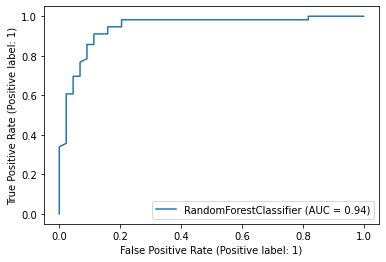

In [ ]:
y_RandomForest_pred = model3.predict(X_test)
eve(Y_test , y_RandomForest_pred , model3)

# Trying Support Vector Machine

## First Trying Linear SVM

In [ ]:
np.random.seed(42)
model4 = SVC(kernel='linear' , random_state=0)
model4.fit(X_train , Y_train)

SVC(kernel='linear', random_state=0)

Accuracy  :  0.88 %
Precision :  0.8793103448275862 %
Recall    :  0.9107142857142857 %
F1 Score  :  0.8947368421052632 %
ROC_AUC_Score :  0.8758116883116882

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.88      0.91      0.89        56

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


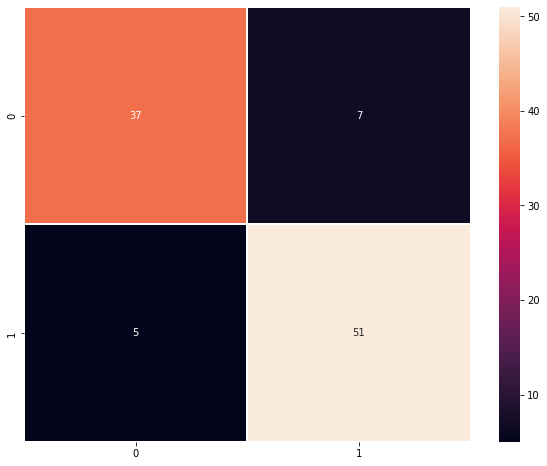

<Figure size 1080x576 with 0 Axes>

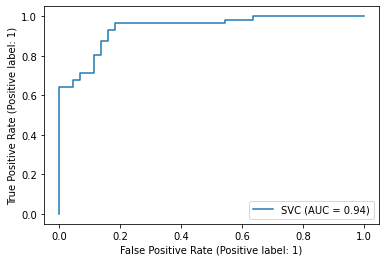

In [ ]:
y_SVM_pred = model4.predict(X_test)
eve(Y_test , y_SVM_pred , model4)

## Trying Non-linear SVM

In [ ]:
np.random.seed(42)
model5 = SVC(kernel='rbf' , random_state=0)
model5.fit(X_train , Y_train)

SVC(random_state=0)

Accuracy  :  0.73 %
Precision :  0.7843137254901961 %
Recall    :  0.7142857142857143 %
F1 Score  :  0.7476635514018691 %
ROC_AUC_Score :  0.7321428571428572

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        44
           1       0.78      0.71      0.75        56

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


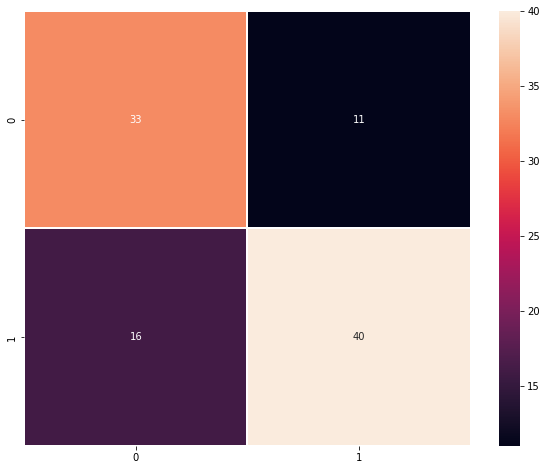

<Figure size 1080x576 with 0 Axes>

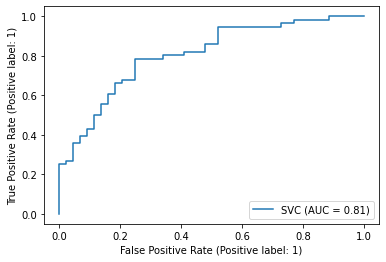

In [ ]:
y_pred = model5.predict(X_test)
eve(Y_test , y_pred , model5)

# Trying Decision Tree

In [ ]:
np.random.seed(42)
model6 = DecisionTreeClassifier(criterion='entropy')
model6.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy')

Accuracy  :  0.79 %
Precision :  0.8301886792452831 %
Recall    :  0.7857142857142857 %
F1 Score  :  0.8073394495412844 %
ROC_AUC_Score :  0.7905844155844155

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        44
           1       0.83      0.79      0.81        56

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


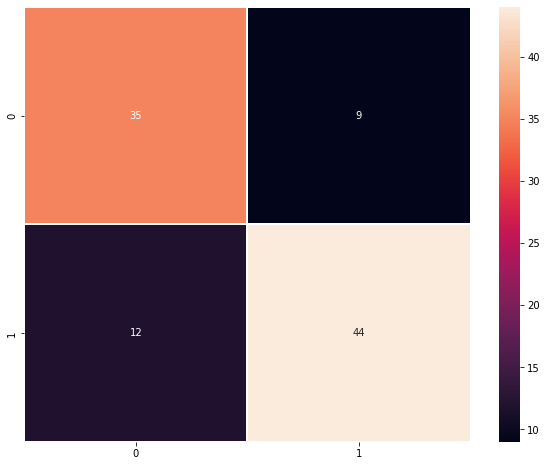

<Figure size 1080x576 with 0 Axes>

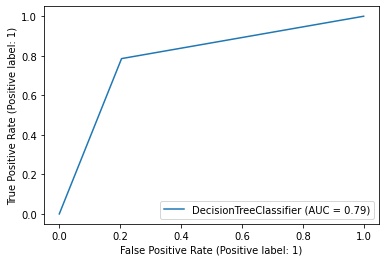

In [ ]:
y_DecisionTree_pred = model6.predict(X_test)
eve(Y_test , y_DecisionTree_pred , model6)

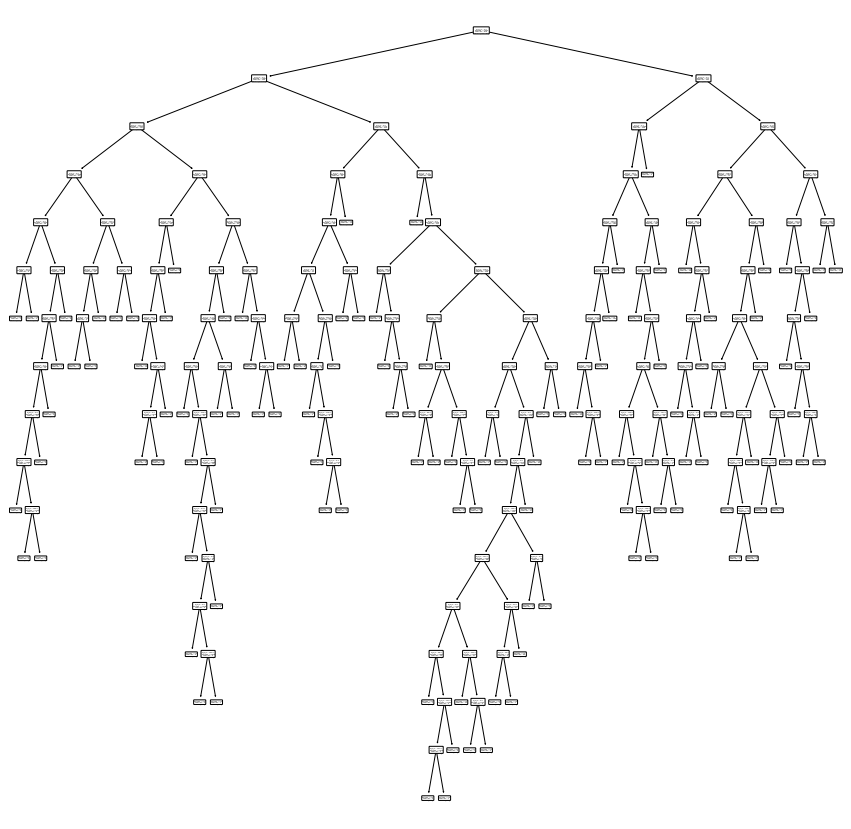

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(model6 , rounded=True)
plt.show()

# Tring Naive Bayes Classifier

In [ ]:
np.random.seed(42)
model7 = GaussianNB()
model7.fit(X_train , Y_train)

GaussianNB()

Accuracy  :  0.85 %
Precision :  0.8867924528301887 %
Recall    :  0.8392857142857143 %
F1 Score  :  0.8623853211009174 %
ROC_AUC_Score :  0.8514610389610391

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        44
           1       0.89      0.84      0.86        56

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


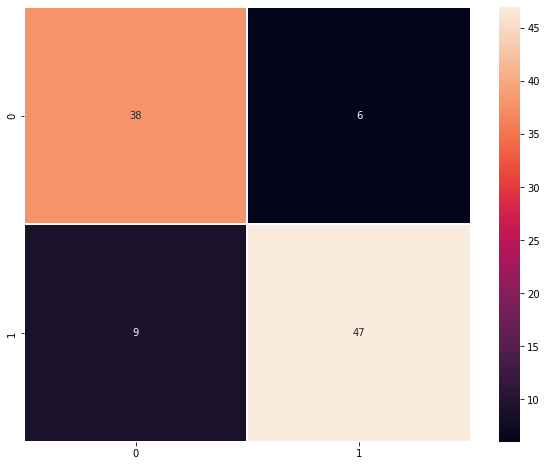

<Figure size 1080x576 with 0 Axes>

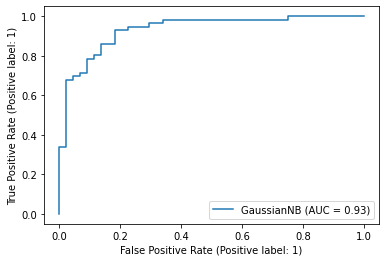

In [ ]:
y_GNB_pred = model7.predict(X_test)
eve(Y_test , y_GNB_pred , model7)

# Tring Gradient Boosting

In [ ]:
np.random.seed(42)
model8 = GradientBoostingClassifier(n_estimators=250 , learning_rate=0.1)
model8.fit(X_train , Y_train)

GradientBoostingClassifier(n_estimators=250)

Accuracy  :  0.9 %
Precision :  0.9107142857142857 %
Recall    :  0.9107142857142857 %
F1 Score  :  0.9107142857142857 %
ROC_AUC_Score :  0.898538961038961

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.91      0.91      0.91        56

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


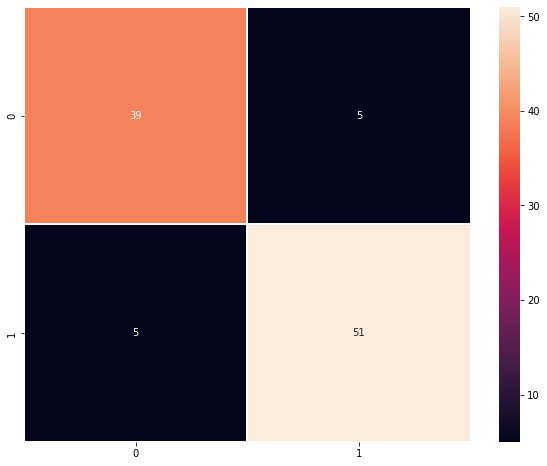

<Figure size 1080x576 with 0 Axes>

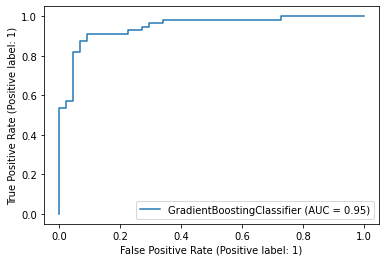

In [ ]:
y_GB_pred = model8.predict(X_test)
eve(Y_test , y_GB_pred , model8)

# Linear Classification models: 
1. Logistic Regression
2. K Nearest Neighnours
3. Gaussian Naive Bayesian Classifier
4. Support Vector Machine

# Ensemble Machine Learning Classification models :
1. RandomForestClassifier
2. GradientBosstingTree
3. Decision Trees

# Heatmaps of all Linear Models

In [ ]:
conf_logistic_regression , logistic_acc = confusion_matrix(Y_test , Y_logistic_pred) , accuracy_score(Y_test, model1.predict(X_test))*100
conf_knn , knn_acc = confusion_matrix(Y_test , Y_knn_pred) , accuracy_score(Y_test, model2.predict(X_test))*100
conf_RandomForest , RF_acc = confusion_matrix(Y_test , y_RandomForest_pred) , accuracy_score(Y_test, model3.predict(X_test))*100
conf_GNB , GNB_acc = confusion_matrix(Y_test , y_GNB_pred) , accuracy_score(Y_test, model7.predict(X_test))*100
conf_GB , GB_acc = confusion_matrix(Y_test , y_GB_pred) , accuracy_score(Y_test, model8.predict(X_test))*100
conf_SVM , SVM_acc = confusion_matrix(Y_test , y_SVM_pred) , accuracy_score(Y_test, model4.predict(X_test))*100
conf_DecisionTree , DT_acc= confusion_matrix(Y_test , y_DecisionTree_pred) , accuracy_score(Y_test, model6.predict(X_test))*100
accs = [logistic_acc , knn_acc , RF_acc , GNB_acc , GB_acc , SVM_acc , DT_acc]

In [ ]:
logistic_acc

88.0

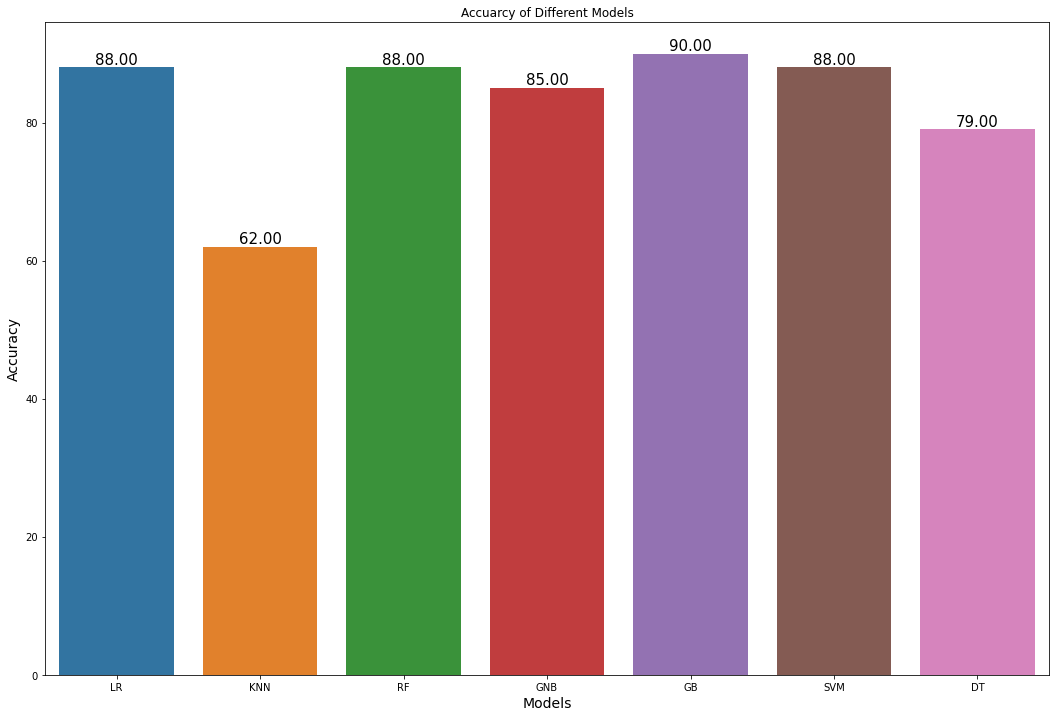

In [ ]:
# Defining the plot size
plt.figure(figsize=(18, 12))

# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x=['LR','KNN','RF','GNB','GB','SVM','DT'], y=accs)

# Iterating over the bars one-by-one
for bar in plots.patches:

# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=14)

# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)

# Setting the title for the graph
plt.title("Accuarcy of Different Models")

# Finally showing the plot
plt.show()
